In [1]:
import numpy as np  
import scipy
import matplotlib.pyplot as plt 
import spectral_derivative as sd 


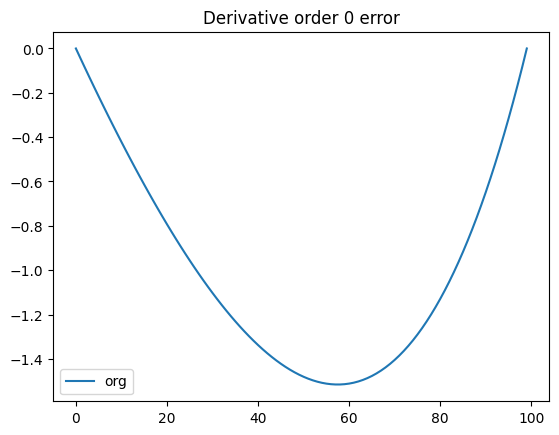

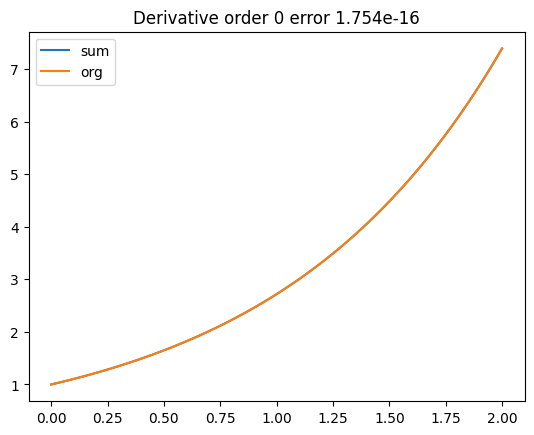

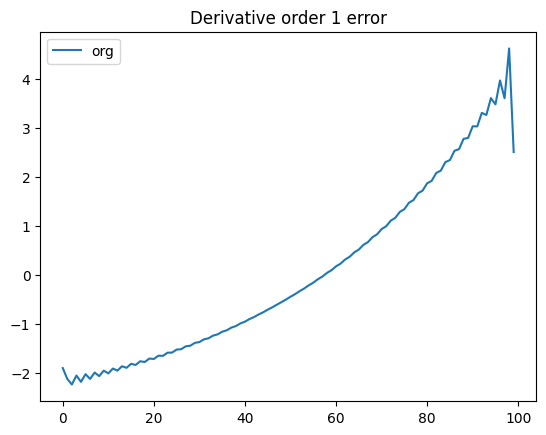

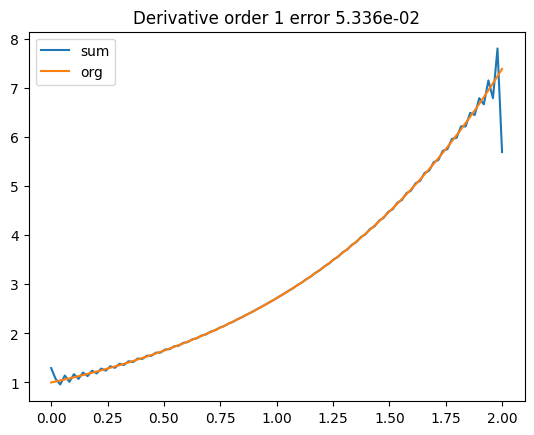

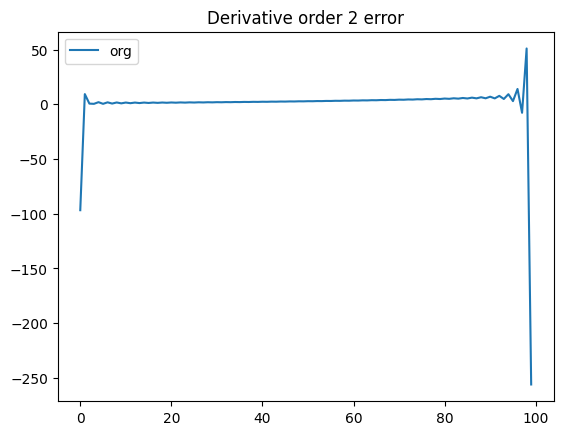

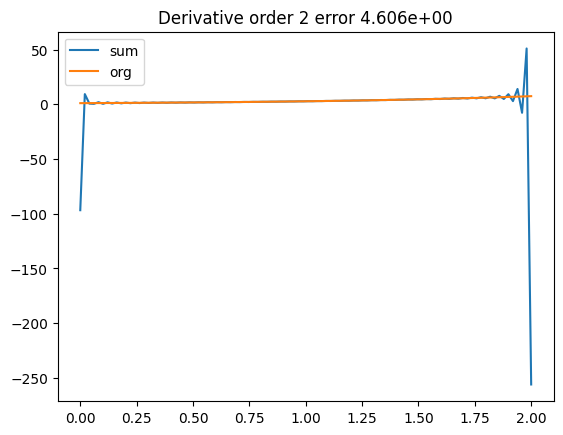

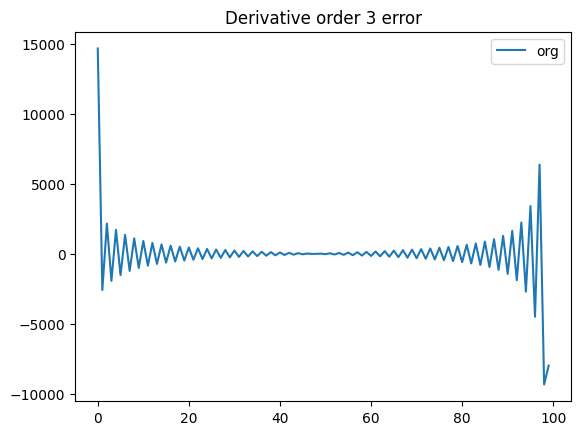

: 

: 

In [3]:
x, dx = sd.computeX(0, 2, 100)
for i in range(10): 
    forg = np.exp(x)
    B, poly = sd.getShiftFunction(x, forg, mode=sd.M_POLYNOMIAL, derivative_mode=sd.ONE_SIDED, lb = 0, rb = 0, chop = False)
    hom  = forg - B[0]
    fhat = scipy.fft.fft(hom) 
    k    = sd.computeK(fhat, dx, sd.PERIODIC)
    frec = scipy.fft.ifft(fhat * (1j*k)**i)
    plt.title(f"Derivative order {i} error")
    plt.plot(frec.real, label="org") 
    plt.plot()
    plt.legend()
    plt.show()
    frec = frec
    reco = poly(x, i)
    sumo = frec + reco 
    plt.title(f"Derivative order {i} error {np.mean(np.abs(sumo-forg)):3.3e}")
    plt.plot(x, frec, label="rec") 
    plt.plot(x, reco, label="reco") 
    plt.legend()
    plt.show() 
    plt.title(f"Derivative order {i} error {np.mean(np.abs(sumo-forg)):3.3e}")
    plt.plot(x, sumo, label="sum") 
    plt.plot(x, forg, label="org") 
    plt.legend()
    plt.show() 

## Test decay of Fourier coefficients

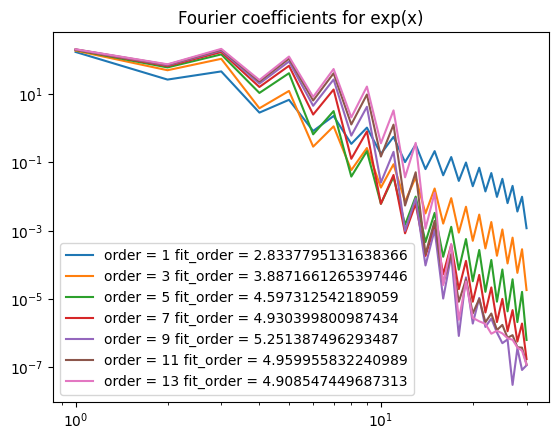

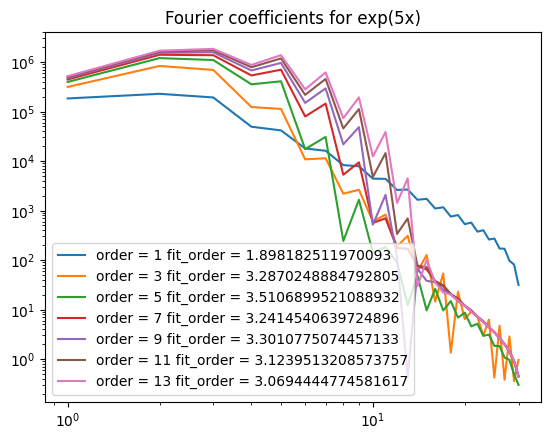

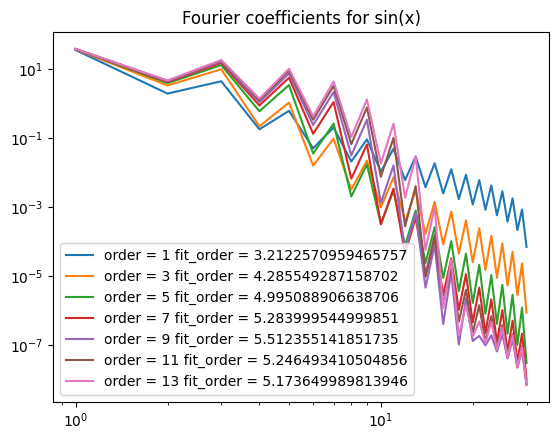

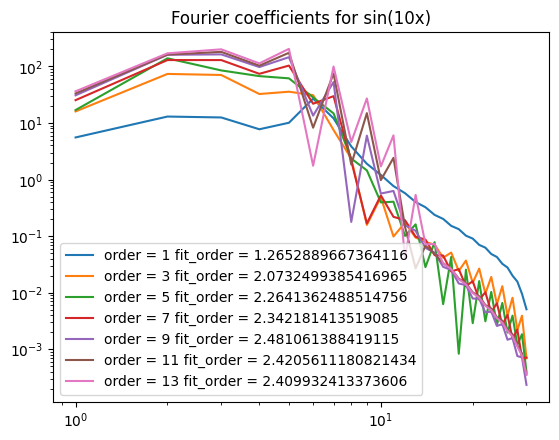

In [55]:
x = np.linspace(0, 2, 32)
fs = [np.exp(x), np.exp(5*x), np.sin(x), np.sin(x*10)]
ns = ["exp(x)", "exp(5x)", "sin(x)", "sin(10x)"]

if 0:
    for f, n in zip(fs, ns): 
        plt.title(f"Fourier coefficients for {n}") 
        plt.yscale("log") 
        for order in [1, 3, 5, 7, 9, 11, 13]: 
            shift, C, xeval = getShiftFunction(f, order, x)
            hom = f - shift 
            ext = antisymmetricExtension(hom)
            fhat = scipy.fft.fft(ext) 
            plt.plot(np.abs(fhat), label=f"order = {order}") 
        plt.legend()
        plt.show() 


for f, n in zip(fs, ns): 
    plt.title(f"Fourier coefficients for {n}") 
    for order in [1, 3, 5, 7, 9, 11, 13]: 
        shift, C, xeval = getShiftFunction(f, order, x)
        hom = f - shift 
        ext = antisymmetricExtension(hom)
        fhat = scipy.fft.fft(ext) 
        y    = np.abs(fhat)[1:int(len(fhat)/2)]
        r    = np.arange(1, len(y)+1)
        #print(len(y), len(r))
        def fitfunc(x, beta): 
            return np.log(y[0]) + beta * np.log(x)
        coeff, cov = scipy.optimize.curve_fit(fitfunc, r, np.log(y)) 
        #print(coeff)
        plt.loglog(r, y, label=f"order = {order} fit_order = {np.abs(coeff[0])}") 
        #plt.loglog(r, np.exp(fitfunc(r, coeff[0])), label=f"fit with {y[0]} * x ** {coeff[0]}") 
    plt.legend()
    plt.show() 

In [31]:
x = np.linspace(0, 1, 100)
y = x
def fitfunc(x, alpha, beta): 
    return alpha*x**beta
coeff, cov = scipy.optimize.curve_fit(fitfunc, x, y)

In [32]:
coeff

array([1., 1.])